Zadanie 4.

W tej części będziemy zajmować się zmienną losową $Z=X \cdot Y + sin(X)$, gdzie $X,Y~N(0,1)$. Wiemy, że $X \perp Y$ oraz, że $\mathrm{E}(Y)=0$.

Zadanie polega na wysymulowaniu wartości oczekiwanej zmiennej losowej $Z$ pod warunkiem $X=x$ i sprawdzeniu czy odpowiada to wartościom teoretycznym $\mathrm{E}(Z|X)=sin(X)$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Pierwsza część

n_samples = 1000 #lba próbek

X = np.random.normal(0, 1, n_samples)
Y = np.random.normal(0, 1, n_samples)

Z = X * Y + np.sin(X)

E_Z_given_X = np.sin(X)

bins = np.linspace(np.min(X), np.max(X), 30)
bin_centers = 0.5 * (bins[1:] + bins[:-1])
bin_means = np.zeros(len(bin_centers))

for i in range(len(bin_centers)):
    in_ = (X >= bins[i]) & (X < bins[i + 1])
    bin_means[i] = np.mean(Z[in_])


d:\Programy\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\Programy\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


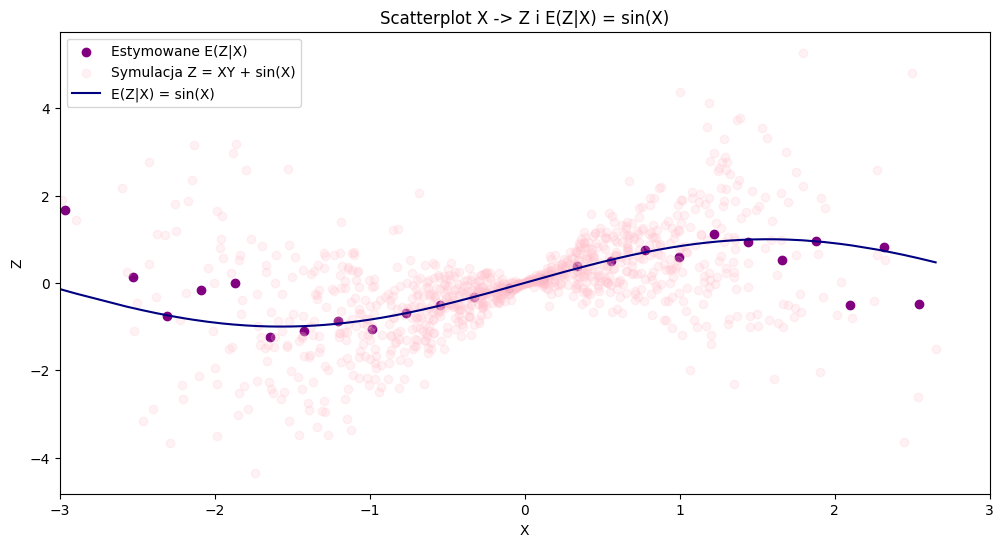

In [38]:
plt.figure(figsize=(12, 6))
plt.scatter(bin_centers, bin_means, color='purple', label='Estymowane E(Z|X)')
plt.xlim(-3, 3)
plt.scatter(X, Z, alpha=0.2, label='Symulacja Z = XY + sin(X)', color = 'pink')
plt.plot(np.sort(X), E_Z_given_X[np.argsort(X)], color='navy', label='E(Z|X) = sin(X)')
plt.xlabel('X')
plt.ylabel('Z')
plt.title('Scatterplot X -> Z i E(Z|X) = sin(X)')
plt.legend()
plt.show()


Po przeanalizowaniu wykresu widać, że wartości $Z=X \cdot Y + sin(X)$ mają tendencję do skupiania się wokół wykresu $\mathrm{E}(Z|X)=sin(X)$. Ponadto fioletowe punkty, które odpowiadają empirycznej wartości oczekiwanej pokrywają się z wykresem funkcji $\mathrm{E}(Z|X)=sin(X)$.

W drugiej części zadania sprawdzać będziemy zgodność teoretycznej i empirycznej wartości oczekiwanej $\mathrm{E}(N_t|N_T)$. W tym celu bierzemy próbkę t_values i najpierw generujemy dla niej teroretyczną wartość oczekiwaną zadaną wzorem $\mathrm{E}(N_t|N_T=NT)=\frac{tN_T}{T}$, a następnie symulujemy proces $N_t$ i sprawdzamy zgodność.

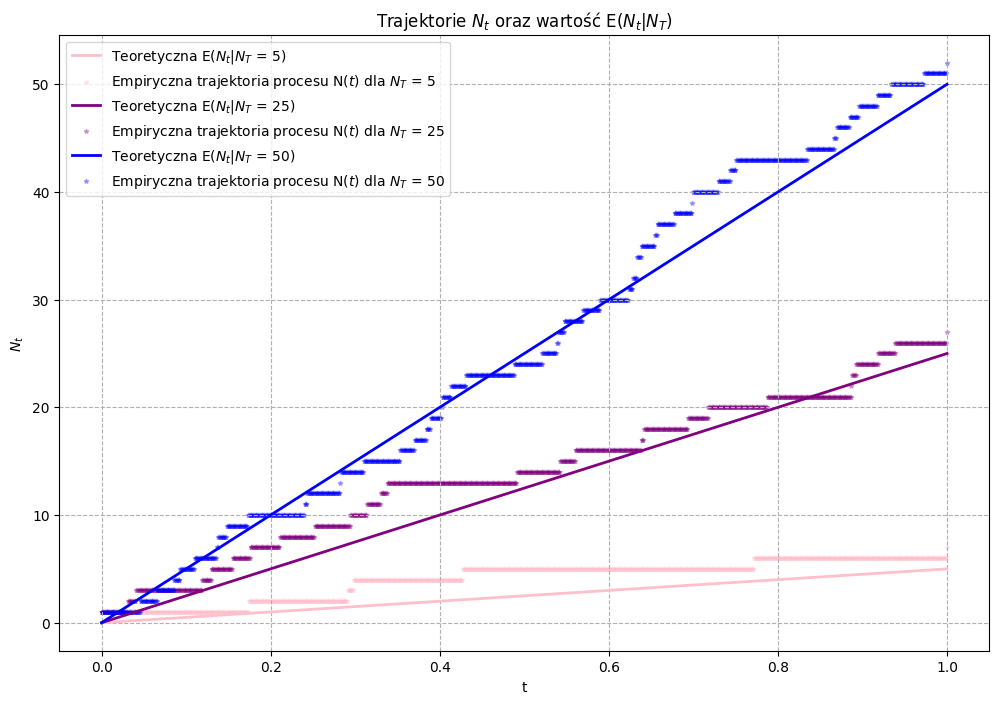

In [5]:
def teoretyczna_w_o(t_values, NT, T):
    """
    Generuje teoretyczne wartości oczekiwane.
    """
    return (t_values * NT) / T

def poisson(k, T=1, s=0, Ns=0):
    """
    Generuje proces Poissona.

    Input:
    k (int) rozmiar
    T (int) horyzont czasowy
    s (int) początek obserwacji
    Ns (int) wartość w s

    Output:
    final_S (list) czasy skoków procesu
    N_t (np.ndarray) wartości procesu w danych momentach 
    """
    t_values = np.linspace(s, T, 1000)
    S = np.random.uniform(low=s, high=T, size=k)
    S.sort()
    final_S = [s] + list(S) + [T]
    N_t = np.array([Ns + np.sum(S <= t) for t in t_values])
    return final_S, N_t

def plot_poisson_expectations(T=1, NT_val=np.array([5, 25, 50])):
    """
    Funkcja zwraca wykresy teoretycznych i symulacyjnych wartości oczekiwanych.

    Input:
    T (int) horyzont czasowy
    NT_val (np.array) poziomy N_T dla których plotujemy wykresy gęstości.
    """
    t_values = np.linspace(0, T, 1000)
    colors = ['pink', 'purple', 'blue']

    plt.figure(figsize=(12, 8))

    for i, color in zip(NT_val, colors):
        expectation = teoretyczna_w_o(t_values, i, T)
        poisson_process_times = poisson(i, T)[0]

        N_t = np.array([np.sum(np.array(poisson_process_times) <= t) for t in t_values])

        plt.plot(t_values, expectation, label=f'Teoretyczna E($N_t|N_T$ = {i})', color=color, linewidth=2)
        plt.scatter(t_values, N_t, label=f'Empiryczna trajektoria procesu N($t$) dla $N_T$ = {i}', color=color, marker='*', s=10, alpha=0.3)
    
    plt.xlabel('t')
    plt.ylabel('$N_t$')
    plt.title('Trajektorie $N_t$ oraz wartość E$(N_t|N_T)$')
    plt.legend()
    plt.grid(linestyle = '--')
    plt.show()

plot_poisson_expectations()


Wykresy odpowiadają sobie.

W trzeciej części zadania należy wyznaczyć estymowaną i teoretyczną wartość oczekiwaną, taką że : $\mathrm{E}(N_t|F_s)$. W treści zadania podana została podana wartość estymowana: $N_s+\lambda(t-s)$, gdzie s jest momentem od którego zaczynamy obserwacje trwającego procesu, a $t \geq s$. Wygenerowane wartości porównujemy z trajektoriami $N_s$.

<>:16: SyntaxWarning: invalid escape sequence '\i'
<>:16: SyntaxWarning: invalid escape sequence '\i'
C:\TEMP\ipykernel_13620\53698983.py:16: SyntaxWarning: invalid escape sequence '\i'
  plt.title("Trajektorie $N_t$ i E($N_t|F_2$), t $\in$ [1,10]")


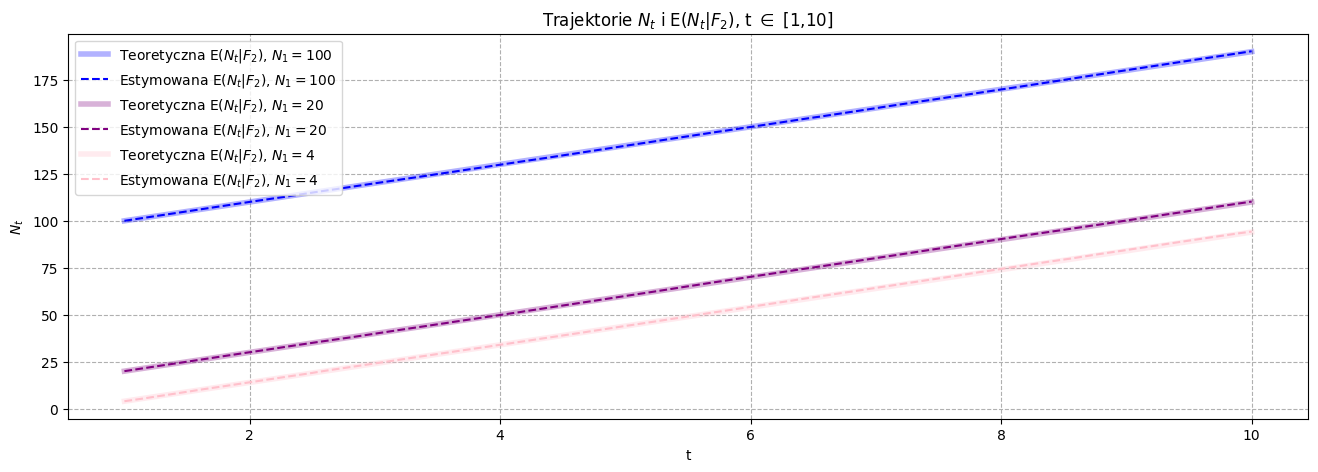

In [32]:
def przyszlosc(s=1, T=10, Ns_values=[4, 20, 100], lambda_=10):
    """
    Funkcja generuje wykres trajektorii E($N_t|F_2$) i jej estymowanej trajektorii .

    Input:
    s (int) czas, w kórym startują obserwacje
    T (int) horyzont czasowy
    Ns_values (array) poziomy startowe
    lambda_ (int) intensywność procesu Poissona
    """
    t_values = np.linspace(s, T, 1000)
    e2 = np.array([poisson(np.random.poisson(1000 * lambda_ * (T - s)), T, s, Ns=1000 * NS)[1] / 1000 for NS in Ns_values])
    colors =  dict(zip(Ns_values, ['pink', 'purple', 'blue']))

    plt.figure(figsize=(16, 5))
    plt.title("Trajektorie $N_t$ i E($N_t|F_2$), t $\in$ [1,10]")
    for i in range(len(Ns_values))[::-1]:
        NS = Ns_values[i]

        plt.plot(t_values, NS + lambda_ * (t_values - s), c=colors[NS], label=f"Teoretyczna E($N_t|F_2$), $N_1 = {NS}$", linewidth=4, alpha = 0.3)
        plt.plot(t_values, e2[i], linestyle='--', c=colors[NS], label=f"Estymowana E($N_t|F_2$), $N_1 = {NS}$")
    
    plt.xlabel("t")
    plt.ylabel("$N_t$")
    plt.legend()
    plt.grid(linestyle='--')
    plt.show()

przyszlosc()
